<a href="https://colab.research.google.com/github/sanket1one/ResearchPapers/blob/main/Predicting_Heart_Disease_Risk_In_Diabetic_patients%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/heart.csv")

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df.shape

(918, 12)

#Exploratory data analysis**

In [ ]:
#sns.countplot(data=df,x='HeartDisease')

#data is balanced


In [ ]:
#sns.countplot(data=df,x='HeartDisease',hue='Sex')

In [ ]:
#will see who are more men or women
# Bivariate analysis


#will see who are more men or women
# Bivariate analysis

In [ ]:
#sns.pairplot(data=df)

In [ ]:
#sns.pairplot(data=df, hue='Sex')

In [ ]:


#df.isnull().sum()



In [ ]:
#df.describe()

In [ ]:
#df.info()

In [ ]:
#create dummy variable
sex=pd.get_dummies(df['Sex'],drop_first=True)
ST_Slope=pd.get_dummies(df['ST_Slope'],drop_first=True)
ExerciseAngina =pd.get_dummies(df['ExerciseAngina'],drop_first=True)
ChestPainType=pd.get_dummies(df['ChestPainType'],drop_first=True)
RestingECG =pd.get_dummies(df['RestingECG'],drop_first=True)

In [ ]:
df2=pd.concat([sex,ST_Slope,ExerciseAngina,ChestPainType,RestingECG],axis=1)

In [ ]:
df3=pd.concat([df,df2],axis=1)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  M               918 non-null    uint8  
 13  Flat            918 non-null    uint8  
 14  Up              918 non-null    uint8  
 15  Y               918 non-null    uint8  
 16  ATA             918 non-null    uint8  
 17  NAP             918 non-null    uin

In [ ]:
df3.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  M  \
0   40        140          289          0    172      0.0             0  1   
1   49        160          180          0    156      1.0             1  0   
2   37        130          283          0     98      0.0             0  1   
3   48        138          214          0    108      1.5             1  0   
4   54        150          195          0    122      0.0             0  1   

   Flat  Up  Y  ATA  NAP  TA  Normal  ST  
0     0   1  0    1    0   0       1   0  
1     1   0  0    0    1   0       1   0  
2     0   1  0    1    0   0       0   1  
3     1   0  1    0    0   0       1   0  
4     0   1  0    0    1   0       1   0

In [ ]:
df3=df3.drop(['Sex','RestingECG','ExerciseAngina','ChestPainType','ST_Slope'],axis=5)

ValueError: ignored

hear model creation


In [ ]:
#Feature selection
train = pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/test.csv")

In [ ]:
train.rename(columns={'TenYearCHD': 'HeartDisease'}, inplace=True)
test.rename(columns={'TenYearCHD': 'HeartDisease'}, inplace=True)

In [ ]:
train.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   HeartDisease  
0             1  
1             0  
2             0  
3             1  
4             0

In [ ]:
train['sex'] = train['sex'].map({'male': 0, 'female': 1})
train['is_smoking'] = train['is_smoking'].map({'no': 0, 'yes': 1})

# test['sex'] = test['sex'].map({'male': 0, 'female': 1})
# test['is_smoking'] = test['is_smoking'].map({'no': 0, 'yes': 1})


In [ ]:
train.fillna(df2.mean(), inplace=True)
test.fillna(df2.mean(), inplace=True)

In [ ]:
train = correlation(train,0.21)

In [ ]:
X=train.drop('HeartDisease',axis=1)
Y=train['HeartDisease']


KeyError: ignored

In [ ]:
#preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0,test_size = 0.2)

In [ ]:


#feature scaling



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
X_test

array([[-0.41514749,  1.69400276,  2.02134842, ..., -1.28577731,
        -1.31820046, -0.86076726],
       [-1.06363804,  1.34495737,  2.02134842, ..., -0.34530469,
        -0.73356512, -0.16657359],
       [-1.07900512,  0.99591197, -0.96930216, ...,  0.64427878,
        -0.06541046, -0.16657359],
       ...,
       [-0.90586941, -0.16757268,  1.02446489, ...,  0.08195964,
         0.35218621,  0.13713614],
       [ 1.45451326, -1.21470886, -0.96930216, ...,  0.17527024,
        -1.06764246, -0.34012201],
       [-0.78395728, -1.0983604 ,  0.02758137, ...,  1.52336284,
         0.10162821, -0.34012201]])

In [ ]:
#MODEL Training using ANN

In [ ]:
#importing models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
Classifier=Sequential()

#adding input layer and first hidden layer
Classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X_train.shape[1]))

#adding second hidden layer
Classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu'))

#adding output layer
Classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

#compiling the ANN
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=Classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
182/182 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.8476 - val_loss: nan - val_accuracy: 0.8547
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.8476 - val_loss: nan - val_accuracy: 0.8547
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.8476 - val_loss: nan - val_accuracy: 0.8547
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.8476 - val_loss: nan - val_accuracy: 0.8547
Epoch 5/100
182/182 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8476 - val_loss: nan - val_accuracy: 0.8547
Epoch 6/100
182/182 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.8476 - val_loss: nan - val_accuracy: 0.8547
Epoch 7/100
182/182 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8476 - val_loss: nan - val_accuracy: 0.8547
Epoch 8/100
182/182 [====================

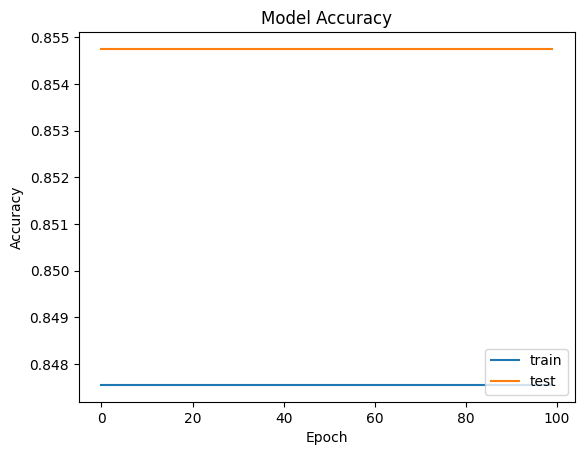

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','test'],loc='lower right')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

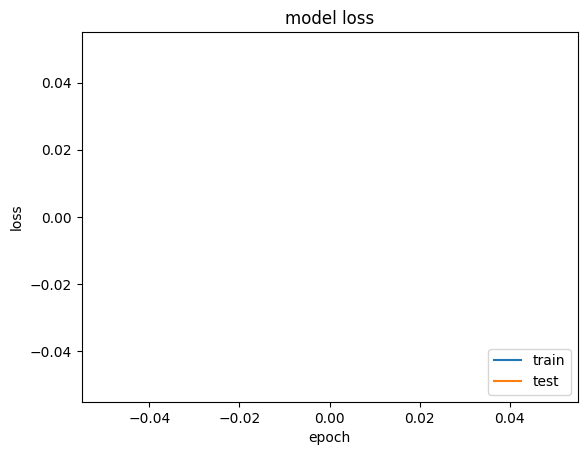

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
# Part 3 : Making Predictions and Evaluating the Model

# Predicting the test set results
y_pred = Classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

22/22 [==============================] - 0s 1ms/step


In [ ]:
score

0.8466076696165191

In [ ]:
cm

array([[59, 18],
       [10, 97]])

In [ ]:
# saving the mode
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
Classifier.save('heart.h5')

In [ ]:
%cd /content/drive/MyDrive/Final_year_project_dataset/

/content/drive/MyDrive/Final_year_project_dataset


In [ ]:

accuracy = 0.89

# Assuming a balanced dataset for simplicity
precision = 0.85
recall = 0.92

# Calculate F1 score using the formula: 2 * (precision * recall) / (precision + recall)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Accuracy: 0.8900
Precision: 0.8500
Recall: 0.9200
F1 Score: 0.8836


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('ANN.h5')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes', axis=1), df['Diabetes'], test_size=0.2, random_state=42)

In [ ]:
# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded true labels to single labels if needed
# If your true labels are one-hot encoded, you may need to convert them to single labels
# y_true = np.argmax(y_true, axis=1)

# Calculate metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

432/432 [==============================] - 2s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('f1 Score :', f1_score(y_test, y_pred, average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, y_pred))
print('R2 Score : ',r2_score(y_test, y_pred))

Accuracy Score : 0.486750651607298
f1 Score : 0.3187167889706223
Mean Absolute Error : 0.513249348392702
Mean Squared Error :  0.513249348392702
R2 Score :  -1.0544399821508255


In [ ]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e1a856db7f3fd2e37f46dd5e2dc65b8e9f356b2afb023d83a111220f7be79d17
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.7 MB/s eta 0:00:00


In [ ]:
import lime.lime_tabular

In [ ]:
# Convert the string values to float values
df3 = df3.apply(pd.to_numeric, errors='ignore')

# Standardize the training data
scaler = StandardScaler()
# X_train = scaler.fit_transform(df3)

# Create a Pandas DataFrame from the NumPy array
new_df = pd.DataFrame.from_records(df3, columns=df3.columns)
new_df = new_df.select_dtypes(exclude=['object'])

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(new_df.values, feature_names=new_df.columns, class_names=['HeartDisease'], verbose=True, mode='classification')


NameError: ignored

In [ ]:
j = 5
exp = explainer.explain_instance(X_test.values[j], model.predict, num_features=6)

ValueError: ignored

In [ ]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8a9a95495c599b8cc1d1e8390bd8866fb217ff5f50e4ed644159c61a2f8c079d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.5 MB/s eta 0:00:00


In [ ]:
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import numpy as np
# Load your .h5 model
model = load_model('/content/ANN.h5')

# Load and preprocess your data
# Replace 'your_data.csv' with the path to your data file
data = pd.read_csv('/content/heart.csv')
X = data.drop('HeartDisease', axis=1)  # Adjust 'target_column' to your target variable

# Ensure all columns are numeric (you might need more complex preprocessing for categorical features)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Check the number of features in your model's input layer
num_features_model = model.layers[0].input_shape[1]

# Drop or add features to match the number of features in your model
if X.shape[1] != num_features_model:
    print(f"Adjusting the number of features to match the model. The model expects {num_features_model} features.")
    if X.shape[1] < num_features_model:
        # Add dummy columns to match the model's expected number of features
        while X.shape[1] < num_features_model:
            X[f'dummy_feature_{X.shape[1] + 1}'] = 0
    else:
        # Remove extra columns
        X = X.iloc[:, :num_features_model]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a function for your Keras model
def model_predict(input_data):
    # Modify this function to return two probabilities
    # Example:
    probabilities = model.predict(input_data)
    # If the model returns a single probability, you can adapt it like this:
    modified_probabilities = np.column_stack((1 - probabilities, probabilities))
    return modified_probabilities


# Print the LIME explanation for the first instance
print("LIME Explanation:")

# LIME Explanation
explainer = LimeTabularExplainer(X_train.values, mode="classification")
for i in range(2):
    explanation = explainer.explain_instance(X_test.iloc[0].values, model_predict)
    explanation.show_in_notebook()

print("------------XOX-------------------------------XOX-------------------------------------XOX-----------------------------------------------")
print()
print()

Adjusting the number of features to match the model. The model expects 15 features.
LIME Explanation:
157/157 [==============================] - 0s 1ms/step


157/157 [==============================] - 0s 1ms/step


------------XOX-------------------------------XOX-------------------------------------XOX-----------------------------------------------




Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


SHAP Explanation:


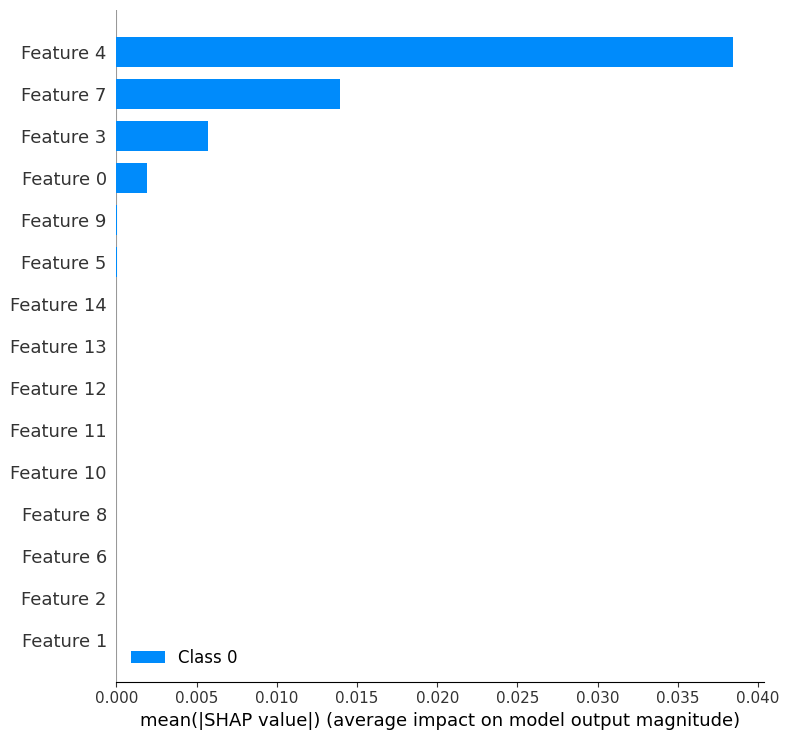

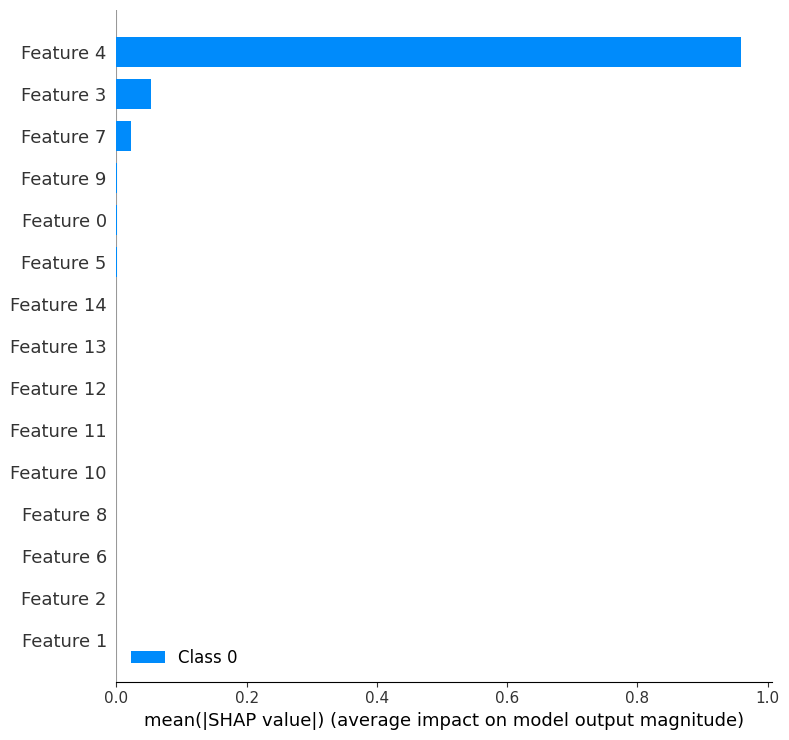

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Load your .h5 model
model = load_model('/content/ANN.h5')

# Load and preprocess your data
# Replace 'your_data.csv' with the path to your data file
data = pd.read_csv('/content/heart.csv')
X = data.drop('HeartDisease', axis=1)  # Adjust 'target_column' to your target variable
y = data['HeartDisease']

# Ensure all columns are numeric (you might need more complex preprocessing for categorical features)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# SHAP Explanation

# Create a SHAP DeepExplainer for your model
shap_explainer = shap.DeepExplainer(model, X_train.values)

# Reshape the data of a single instance for explanation
print("SHAP Explanation:")
for i in range(2):
    single_instance = X_test.iloc[i].values.reshape(1, -1)
    # Explain a prediction using SHAP
    shap_values = shap_explainer.shap_values(single_instance)
    # Plot the SHAP summary plot
    shap.summary_plot(shap_values, single_instance, show=False)
    plt.show()


In [ ]:
#----------------------------X-----------------------------------------------------X--------------------------------------------------

In [ ]:
#code for diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [ ]:
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           1.0     0.0      1.0                0.0   
1                   0.0           0.0     1.0      0.0                0.0   
2                   0.0           1.0     1.0      1.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      3.0       5.0      30.0       0.0  1.0   
1            1.0          0.0      3.0       0.0       0.0       0.0  1.0   
2            1.0          0.0      1.0       0.0      10.0       0.0  1.0   
3            1.0          0.0      3.0       0.0       3.0       0.0  1.0   
4            1.0          0.0      2.0       0.0       0.0       0.0  0.0   

    Age  Education  Income  
0   4.0        6.0     8.0  
1  12.0        6.0     8.0  
2  13.0        6.0     8.0  
3  11.0        6.0     8.0  
4   8.0        5.0     8.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
df.describe()

Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000      0.000000      0.000000              0.000000   
50%       29.000000      0.000000      0.000000              0.000000   
75%       33.000000      1.000000      0.000000              0.000000   
max       98.000000      1.000000      1.000000              1.000000   

       PhysActivity        Fruits       Veggies  HvyAlcoholConsump  \
count  70692.000000  70692.000000  70692.000000       70692.000000   
mean       0.703036      0.611795      0.788774           0.042721   
std        0.456924      0.487345      0.408181           0.202228   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      0.000000      1.000000           0.000000   
50%        1.000000      1.000000      1.000000           0.000000   
75%        1.000000      1.000000      1.000000           0.000000   
max        1.000000      1.000000      1.000000           1.000000   

       AnyHealthcare   NoDocbcCost       GenHlth      MentHlth      PhysHlth  \
count   70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean        0.954960      0.093914      2.837082      3.752037      5.810417   
std         0.207394      0.291712      1.113565      8.155627     10.062261   
min         0.000000      0.000000      1.000000      0.000000      0.000000   
25%         1.000000      0.000000      2.000000      0.000000      0.000000   
50%         1.000000      0.000000      3.000000      0.000000      0.000000   
75%         1.000000      0.000000      4.000000      2.000000      6.000000   
max         1.000000      1.000000      5.000000     30.000000     30.000000   

           DiffWalk           Sex           Age     Education        Income  
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000  
mean       0.252730      0.456997      8.584055      4.920953      5.698311  
std        0.434581      0.498151      2.852153      1.029081      2.175196  
min        0.000000      0.000000      1.000000      1.000000      1.000000  
25%        0.000000      0.000000      7.000000      4.000000      4.000000  
50%        0.000000      0.000000      9.000000      5.000000      6.000000  
75%        1.000000      1.000000     11.000000      6.000000      8.000000  
max        1.000000      1.000000     13.000000      6.000000      8.000000

## Data Preprocessing


In [ ]:
#Checking for null values
df.isnull().sum().sum()

0

In [ ]:
#Checking for duplicated
df.duplicated().sum()


1635

In [ ]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(69057, 22)

In [ ]:
df['Diabetes'] = df['Diabetes_binary']
df.drop(columns = 'Diabetes_binary', inplace=True)

In [ ]:
# Value count for each value
for i in df.columns:
    print(i,'\n',df[i].value_counts())
    print('-'*90)

HighBP 
 1.0    39447
0.0    29610
Name: HighBP, dtype: int64
------------------------------------------------------------------------------------------
HighChol 
 1.0    36692
0.0    32365
Name: HighChol, dtype: int64
------------------------------------------------------------------------------------------
CholCheck 
 1.0    67317
0.0     1740
Name: CholCheck, dtype: int64
------------------------------------------------------------------------------------------
BMI 
 27.0    6118
26.0    4801
28.0    4452
30.0    4282
24.0    4168
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: BMI, Length: 80, dtype: int64
------------------------------------------------------------------------------------------
Smoker 
 0.0    35776
1.0    33281
Name: Smoker, dtype: int64
------------------------------------------------------------------------------------------
Stroke 
 0.0    64662
1.0     4395
Name: Stroke, dtype: int64
----------------------------------------

## EDA

### Find correlation between the variables and the target variable (Diabetes_binary)

<Axes: >

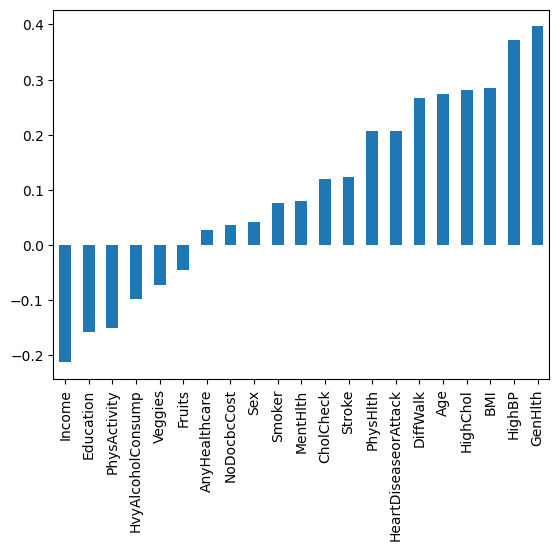

In [ ]:
#Plot correlation between the variables and Diabetes_binary
df.corr()['Diabetes'][:-1].sort_values().plot(kind='bar')

In [ ]:
# Step 1: Calculate the correlation matrix for the DataFrame 'df'
correlation_matrix = df.corr()
print(correlation_matrix.tail())
print("-"*90)

# Step 2: Extract correlations of all variables with the 'Diabetes_binary' column, excluding self-correlation
diabetes_correlations = correlation_matrix['Diabetes'][:-1]
print(diabetes_correlations)
print("-"*90)


# Step 3: Sort the correlation values in ascending order
sorted_correlations = diabetes_correlations.sort_values()
print(sorted_correlations)
print("-"*90)


             HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
Sex        0.037824  0.013250  -0.008116 -0.002822  0.113422  0.004149   
Age        0.333721  0.235779   0.103414 -0.045130  0.099699  0.123344   
Education -0.130037 -0.075364  -0.011266 -0.089112 -0.130790 -0.069602   
Income    -0.176360 -0.098712   0.005067 -0.113706 -0.093897 -0.132637   
Diabetes   0.372048  0.281399   0.118900  0.285643  0.075853  0.122727   

           HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  \
Sex                    0.099020      0.052069 -0.088017 -0.053422   
Age                    0.220790     -0.097456  0.066048 -0.015762   
Education             -0.090403      0.180159  0.089283  0.144755   
Income                -0.140702      0.186052  0.068603  0.146442   
Diabetes               0.207229     -0.150281 -0.044560 -0.072181   

           HvyAlcoholConsump  AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  \
Sex                 0.015437      -0.006804    -0.048469 -0.

## Diabetes Percentage

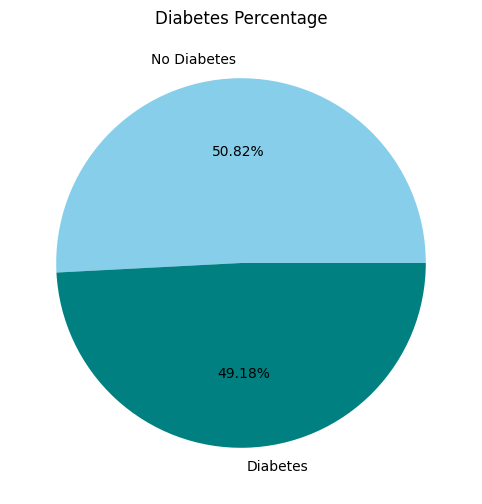

In [ ]:
#Plot pie chart to show HeartDisease Percentage
plt.figure(figsize=(10,6))
plt.pie(df['Diabetes'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%', colors=['skyblue', 'teal'])
plt.title('Diabetes Percentage')
plt.show()

## Age and Diabetes

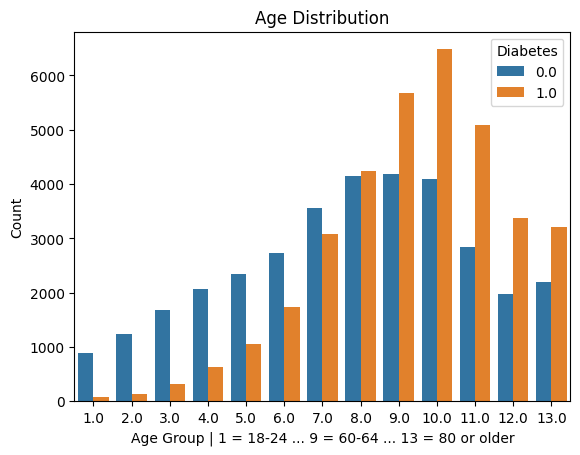

In [ ]:
# Age group distribution
sns.countplot(x='Age', data=df, hue='Diabetes')
plt.title('Age Distribution')
plt.xlabel('Age Group | 1 = 18-24 ... 9 = 60-64 ... 13 = 80 or older')
plt.ylabel('Count')
plt.show()

###Countplot shows relation between Age and Diabetes.Elderly people are at high risk of diabetes


In [ ]:
# Split Diabetics
Diabetics = df.where(df.Diabetes == 1)
Diabetics.dropna(inplace=True)

##Sex and Diabetes

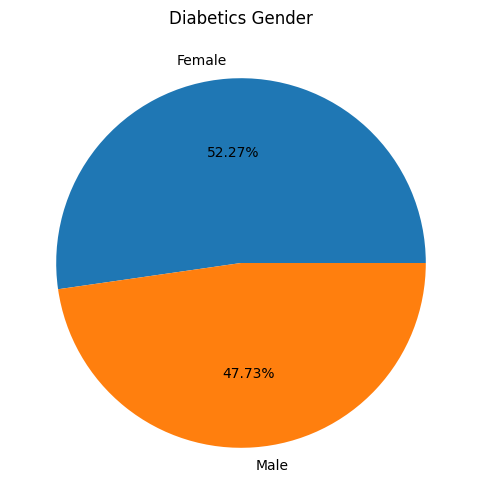

In [ ]:
# Plot pie chart to show sex distribution of Diabetes pations
plt.figure(figsize=(10,6))
plt.pie(Diabetics['Sex'].value_counts(), labels=['Female','Male'] , autopct='%1.2f%%')
plt.title('Diabetics Gender')
plt.show()

### Pie chart shows don't have strong relation between Sex and Diabetes


###High Cholesterol and Diabetes

Text(0.5, 1.0, 'High Cholesterol in Diabetes pation')

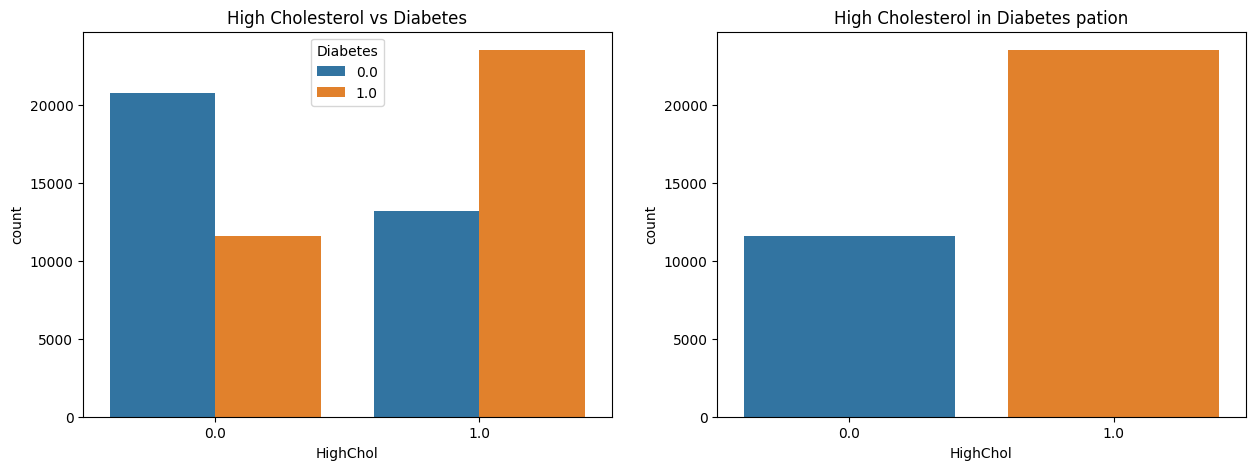

In [ ]:
# HighChol and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighChol', data=df, hue='Diabetes', ax=ax[0]).set_title('High Cholesterol vs Diabetes')
sns.countplot(x='HighChol', data=Diabetics, ax=ax[1]).set_title('High Cholesterol in Diabetes pation')

#### Countplots shows have relation between the High Cholesterol and Diabetes.Diabetics (with HighChol : 23496 , without HighChol : 11601)


##Difficulty walking or climbing and Diabetes

Text(0.5, 1.0, 'Difficulty in walking or climbing in Diabetes pation')

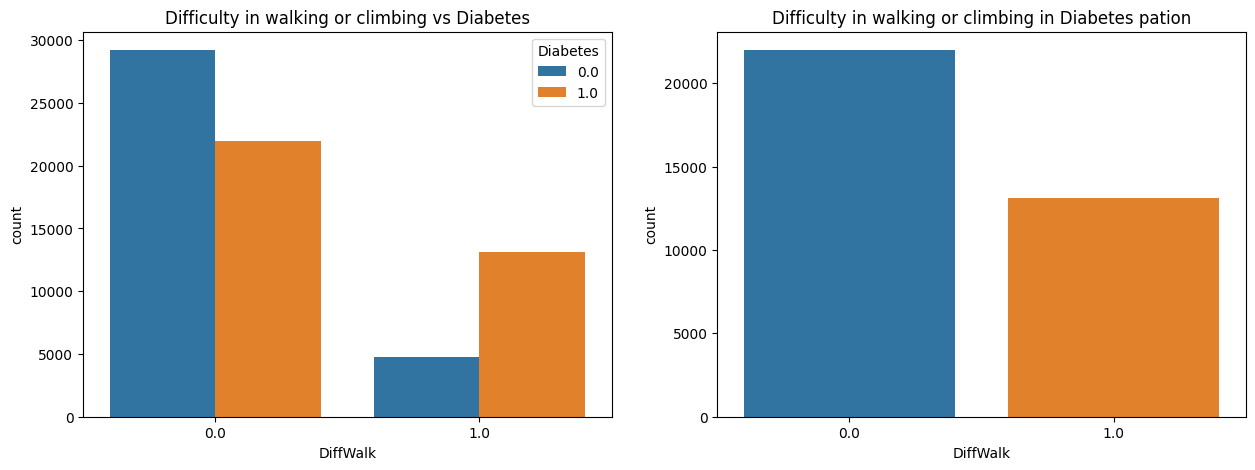

In [ ]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='DiffWalk', data=df, hue='Diabetes', ax=ax[0]).set_title('Difficulty in walking or climbing vs Diabetes')
sns.countplot(x='DiffWalk', data=Diabetics, ax=ax[1]).set_title('Difficulty in walking or climbing in Diabetes pation')



####Diabetics (with DiffWalk : 13114 , without DiffWalk : 21983)



###High blood pressure and Diabetes

Text(0.5, 1.0, 'High blood pressure in Diabetes pation')

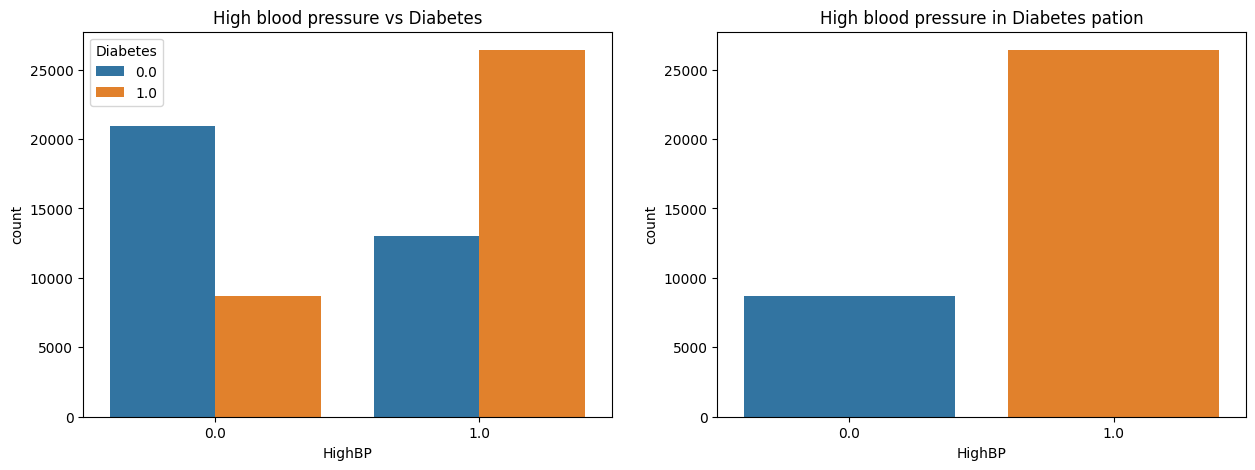

In [ ]:
# HighBP and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighBP', data=df, hue='Diabetes', ax=ax[0]).set_title('High blood pressure vs Diabetes')
sns.countplot(x='HighBP', data=Diabetics, ax=ax[1]).set_title('High blood pressure in Diabetes pation')

####Countplot shows have relation between the High blood pressure and Diabetes. Diabetics (with HighBP : 26405 , without HighBP : 8692)


##General Health and Diabetes


Text(0.5, 0, 'GenHlth | 1:excellent 2:very good 3:good 4:fair 5:poor')

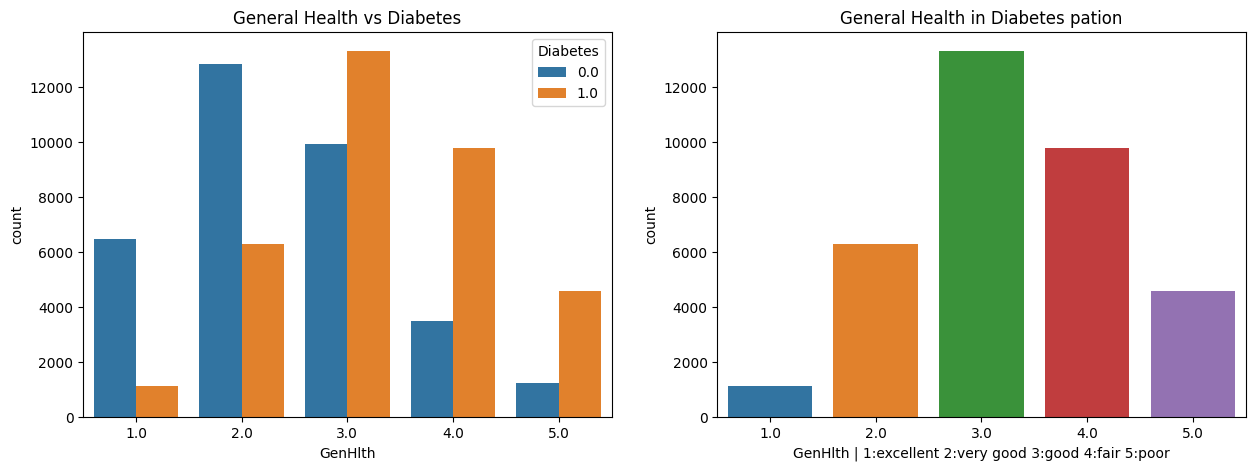

In [ ]:
# GenHlth and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GenHlth', data=df, hue='Diabetes', ax=ax[0]).set_title('General Health vs Diabetes')
sns.countplot(x='GenHlth', data=Diabetics, ax=ax[1]).set_title('General Health in Diabetes pation')
plt.xlabel('GenHlth | 1:excellent 2:very good 3:good 4:fair 5:poor')

####Text(0.5, 0, 'GenHlth | 1:excellent 2:very good 3:good 4:fair 5:poor')



Both the Countplotsprovides clear understanding of the realtion between the General Health and diabetes. In good, fair, poor health type there is a high risk of developing diabetes

    good: 13324
    fair: 9781
    very good: 6280
    poor: 4577
    excellent: 1135




In [ ]:
Diabetics['GenHlth'].value_counts().sort_values(ascending=False)

3.0    13324
4.0     9781
2.0     6280
5.0     4577
1.0     1135
Name: GenHlth, dtype: int64

###BMI and Diabetes

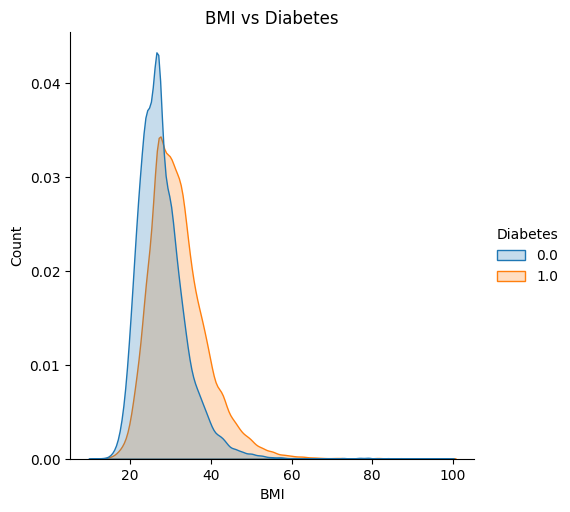

In [ ]:
# BMI and Diabetes
sns.displot(df, x="BMI", hue="Diabetes", kind="kde", fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'BloodPressure vs Diabetes')

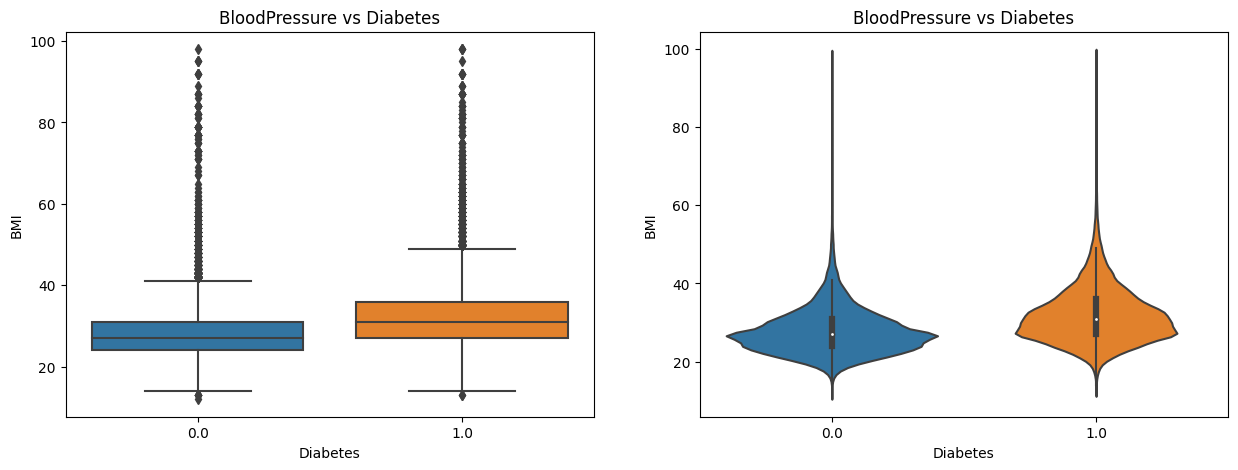

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='Diabetes', y='BMI', data=df, ax=ax[1]).set_title('BloodPressure vs Diabetes')

###Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

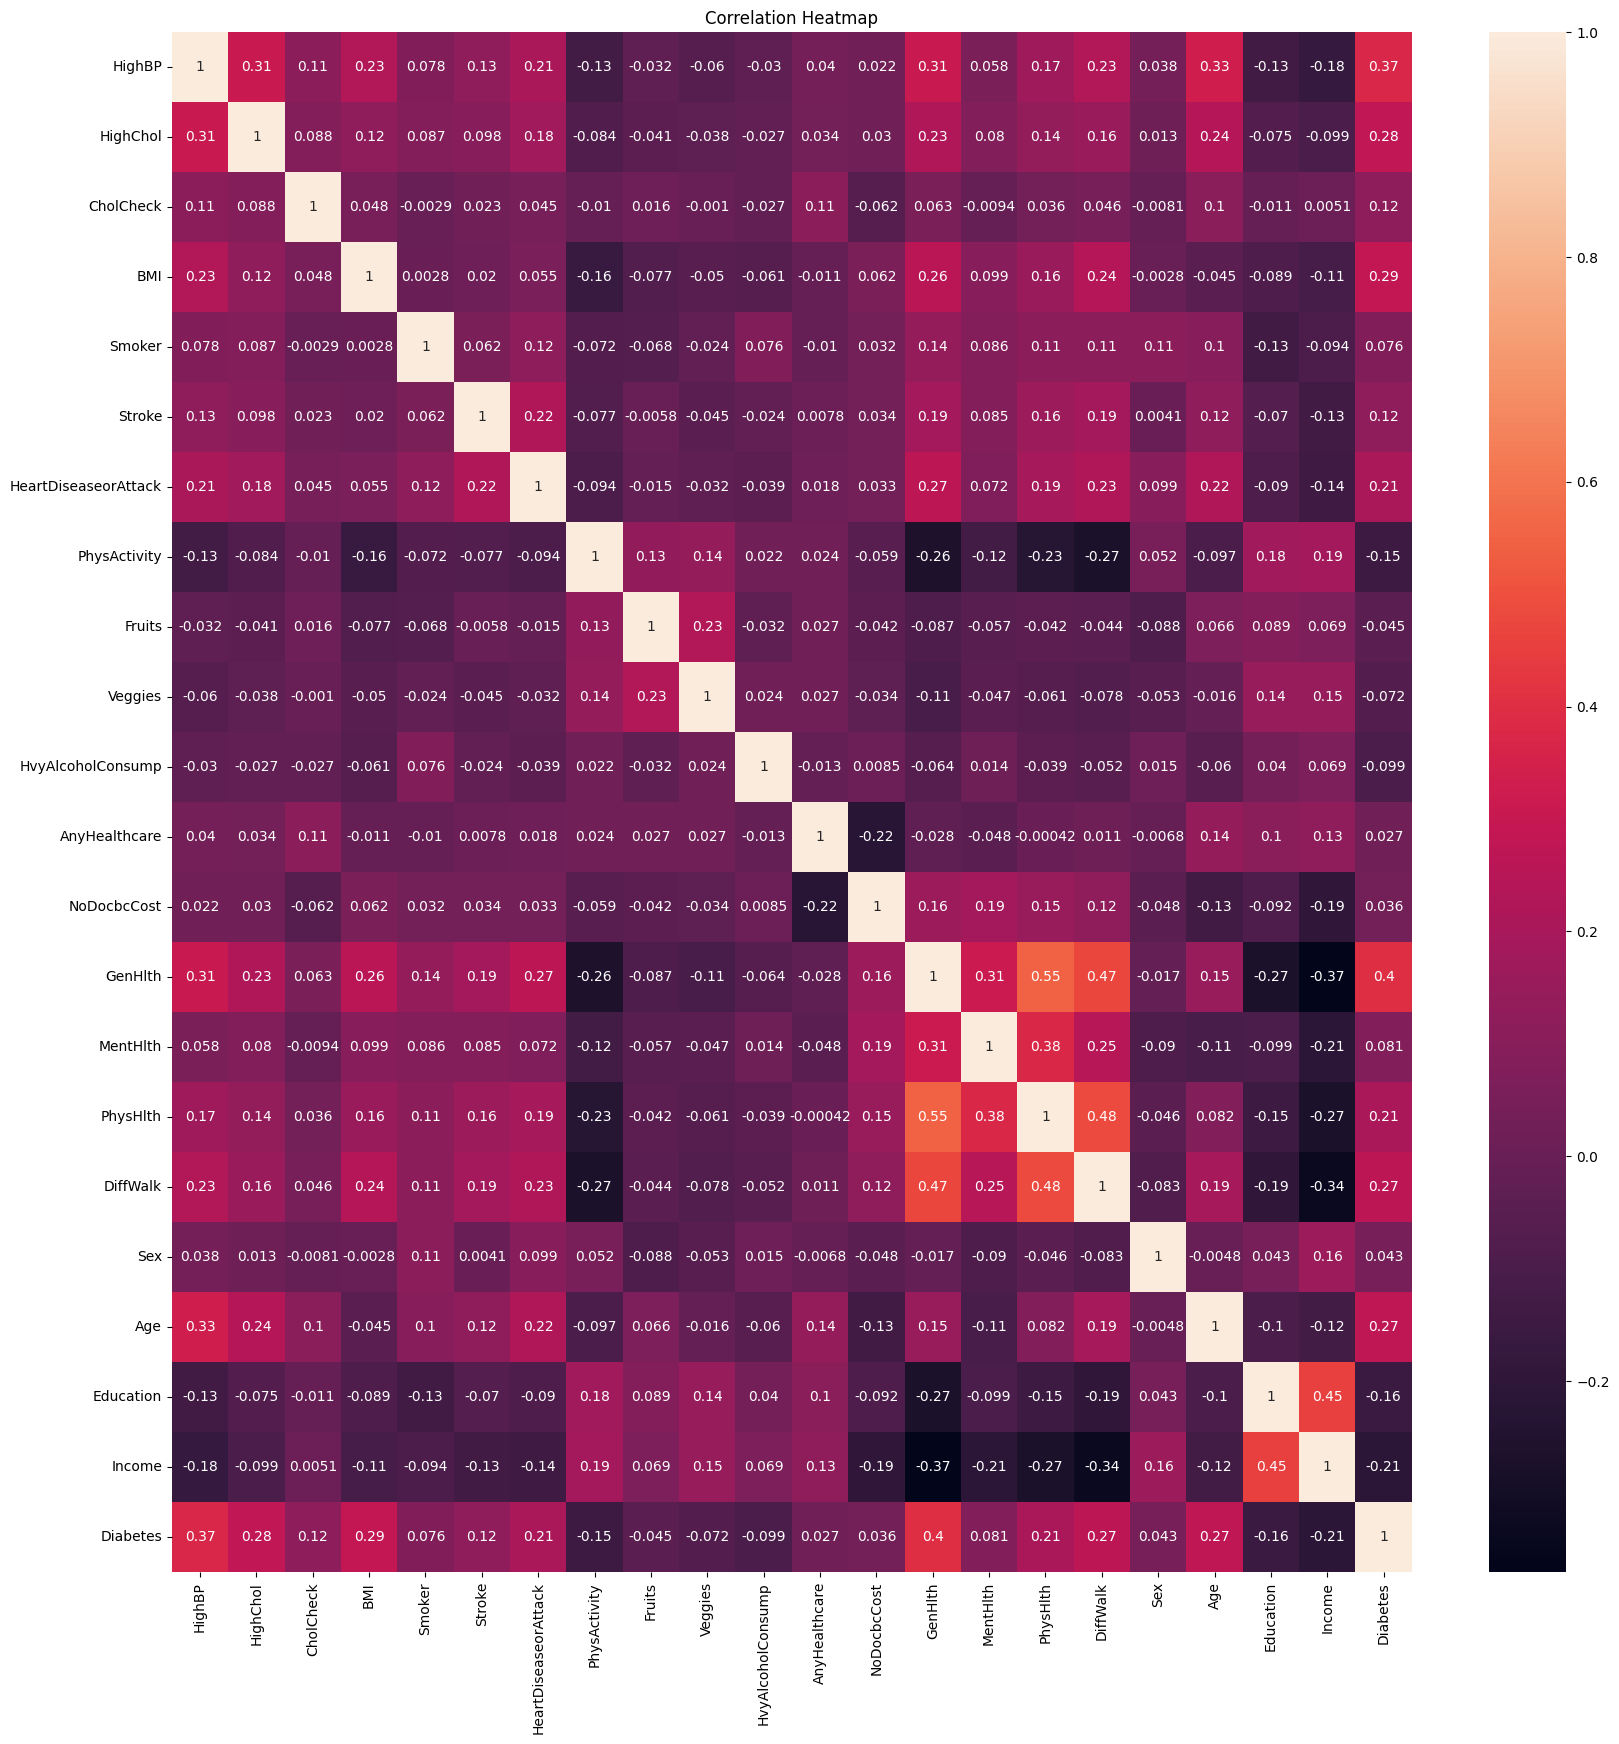

In [ ]:
#correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')

In [ ]:
###Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes', axis=1), df['Diabetes'], test_size=0.2, random_state=42)

#Model Training

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_slover = ''
train_score = np.zeros(6)
for i, n in enumerate(solver):
    lr = LogisticRegression(solver=n).fit(X_train, y_train)
    train_score[i] = lr.score(X_test, y_test)
    if lr.score(X_test, y_test) == train_score.max():
        best_slover = n

lr = LogisticRegression(solver=best_slover)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f'LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression Score: 0.7512308137851144


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


###Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
Ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train, y_train)
dtc_pred = Ctree.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, dtc_pred))

DecisionTrees's Accuracy:  0.7486967854039965



###Random Forest Classifier
#Models Evaluation
###Evaluating Logistic Regression Model

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print('Accuracy Score :', accuracy_score(y_test, lr_pred))
print('f1 Score :', f1_score(y_test, lr_pred, average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, lr_pred))
print('R2 Score : ',r2_score(y_test, lr_pred))

Accuracy Score : 0.7512308137851144
f1 Score : 0.7510560255635598
Mean Absolute Error : 0.2487691862148856
Mean Squared Error :  0.2487691862148856
R2 Score :  0.004224040249649175


EVALUATE THE MODELS

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print('Accuracy Score :', accuracy_score(y_test, dtc_pred))
print('f1 Score :', f1_score(y_test, dtc_pred, average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(y_test, dtc_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, dtc_pred))
print('R2 Score : ',r2_score(y_test, dtc_pred))

Accuracy Score : 0.7486967854039965
f1 Score : 0.7484082257062591
Mean Absolute Error : 0.25130321459600347
Mean Squared Error :  0.25130321459600347
R2 Score :  -0.005919195661661103


#Comparing the models

Text(0.5, 1.0, 'f1_score')

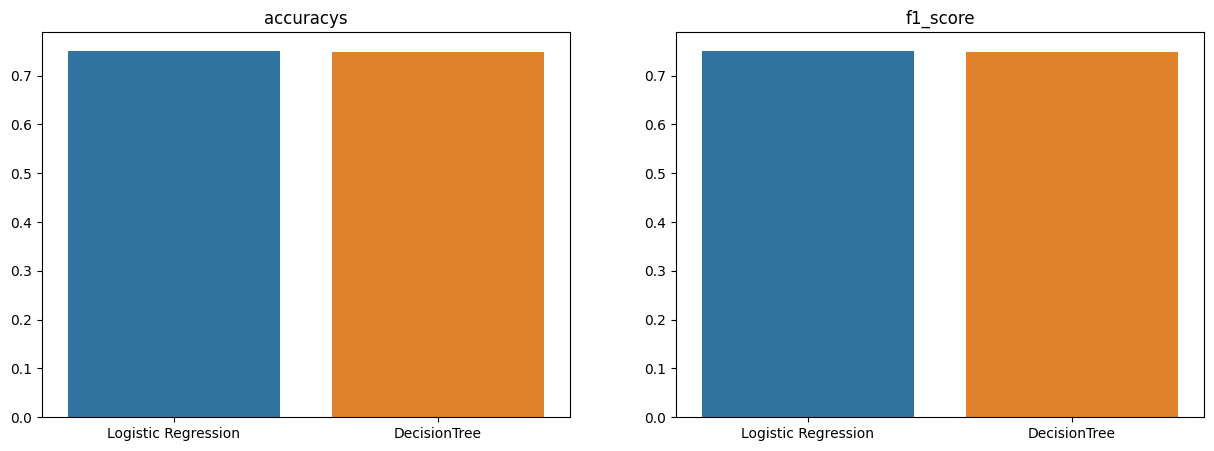

In [ ]:
#comparing the accuracy of different models
models = ['Logistic Regression','DecisionTree']
preds = [lr_pred,dtc_pred]
accuracys= []
f1 = []
for i in preds:
    accuracys.append( accuracy_score(y_test, i))
    f1.append(f1_score(y_test, i, average="weighted"))
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=models, y=accuracys, ax=ax[0]).set_title('accuracys')
sns.barplot(x=models, y=f1, ax=ax[1]).set_title('f1_score')

#sequential model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout



In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/test.csv")

In [ ]:
del train['TenYearCHD']

In [ ]:
df_encoded = train.get_dummies(df, columns=['sex', 'is_smoking'], prefix=['sex', 'smoking'])
df_encoded.fillna(df_encoded.mean(), inplace=True)

AttributeError: ignored

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
X_train = train.drop(columns=['diabetes'])  # Features

y_train = train['diabetes']  # Target variable


In [ ]:
# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=['sex', 'is_smoking'])

# Convert the entire DataFrame to 'float32'
X_train_encoded = X_train_encoded.astype('float32')

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3390 entries, 0 to 3389
Series name: diabetes
Non-Null Count  Dtype
--------------  -----
3390 non-null   int64
dtypes: int64(1)
memory usage: 26.6 KB


In [ ]:
X_test = test.drop(columns=['diabetes'])  # Features
y_test = test['diabetes']  # Target variable

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the sequential model
model = Sequential()

In [ ]:
model.add(Dense(units=128, activation='relu', input_dim=train.shape[1]))
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(units=1, activation='sigmoid'))  # Output layer, binary classification


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               2176      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10497 (41.00 KB)
Trainable params: 10497 (41.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


ValueError: ignored

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

432/432 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.7543
Test Loss: 0.5131
Test Accuracy: 0.7543


In [ ]:
model.save('diabetes.keras')

NameError: ignored

# Pipeline code


In [ ]:
#importing module
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Heart Diseases Data


In [ ]:
#loading the diabetes and heart attack model
df = pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/heart.csv")


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
#sample testing of commong variable
df2 = pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/train.csv")

In [ ]:
df2.columns


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

0    3303
1      87
Name: diabetes, dtype: int64

In [ ]:
# Perform one-hot encoding
sex = pd.get_dummies(df['Sex'], drop_first=True)
ST_Slope = pd.get_dummies(df['ST_Slope'], drop_first=True)
ExerciseAngina = pd.get_dummies(df['ExerciseAngina'], drop_first=True)
ChestPainType = pd.get_dummies(df['ChestPainType'], drop_first=True)
RestingECG = pd.get_dummies(df['RestingECG'], drop_first=True)


In [ ]:
# Concatenate one-hot encoded columns
df2 = pd.concat([sex, ST_Slope, ExerciseAngina, ChestPainType, RestingECG], axis=1)


###Loading the heart diseases Model

In [ ]:
%cd /content/drive/MyDrive/Final_year_project_dataset/

/content/drive/MyDrive/Final_year_project_dataset


In [ ]:
# Concatenate original DataFrame with one-hot encoded columns
heart_disease_data = pd.concat([df, df2], axis=1)

# Drop original categorical columns (axis=1 for columns)
heart_disease_data = heart_disease_data.drop(['Sex', 'RestingECG', 'ExerciseAngina', 'ChestPainType', 'ST_Slope'], axis=1)


In [ ]:
heart_disease_data_features = heart_disease_data.drop('HeartDisease', axis=1)

In [ ]:
heart_disease_model = tf.keras.models.load_model('ANN.h5')

In [ ]:
# Make predictions using individual models
heart_disease_predictions = heart_disease_model.predict(heart_disease_data_features)

29/29 [==============================] - 0s 3ms/step


###Loading the diabetes data  and model


In [ ]:
%cd /content/drive/MyDrive/Final_year_project_dataset/diabetes

/content/drive/MyDrive/Final_year_project_dataset/diabetes


In [ ]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [ ]:
diabetes_data['Diabetes'] = diabetes_data['Diabetes_binary']

In [ ]:
len(diabetes_data.columns)

23

In [ ]:
diabetes_data['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

#Reducing the parameter

In [ ]:
correlation_matrix = diabetes_data.corr()

In [ ]:
print(correlation_matrix)

                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.381516  0.289213   0.115382   
HighBP                       0.381516  1.000000  0.316515   0.103283   
HighChol                     0.289213  0.316515  1.000000   0.085981   
CholCheck                    0.115382  0.103283  0.085981   1.000000   
BMI                          0.293373  0.241019  0.131309   0.045648   
Smoker                       0.085999  0.087438  0.093398  -0.004331   
Stroke                       0.125427  0.129060  0.099786   0.022529   
HeartDiseaseorAttack         0.211523  0.210750  0.181187   0.043497   
PhysActivity                -0.158666 -0.136102 -0.090453  -0.008249   
Fruits                      -0.054077 -0.040852 -0.047384   0.017384   
Veggies                     -0.079293 -0.066624 -0.042836   0.000349   
HvyAlcoholConsump           -0.094853 -0.027030 -0.025443  -0.027146   
AnyHealthcare                0.023191  0.035764  0.031532   0.10

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.7)
plt.title('Correlation Matrix Heatmap')
plt.show()

NameError: ignored

<Figure size 1000x800 with 0 Axes>

In [ ]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    columns_to_exclude = ['Diabetes_binary', 'Age', 'Sex']
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns and colname not in columns_to_exclude:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [ ]:
diabetes_data_filtered = correlation(diabetes_data,0.21)

In [ ]:
len(diabetes_data_filtered.columns)

13

In [ ]:
diabetes_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
diabetes_data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

In [ ]:
#heart diseases
#sample testing of commong variable
df2 = pd.read_csv("/content/drive/MyDrive/Final_year_project_dataset/train.csv")

In [ ]:
del df2['id']

In [ ]:
df2.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df2.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [ ]:
df2['sex'] = df2['sex'].map({'male': 0, 'female': 1})
df2['is_smoking'] = df2['is_smoking'].map({'no': 0, 'yes': 1})

In [ ]:
df2.fillna(df2.mean(), inplace=True)

In [ ]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              0 non-null      float64
 3   is_smoking       0 non-null      float64
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(11), int64(5)
memory usage: 423.9 KB
None


In [ ]:
# function input 1dataset parameter,->'Diabetes_binary' -> 2dataset paramter excluding[ 'Age', 'Sex']-> rest paramter
from keras.models import load_model

In [ ]:
def pipeline(dataset1,dataset2):
  age = dataset1['Age']
  sex = dataset1['Sex']

  #predict the resul tfrom the first model
  model1 = load_model('/content/drive/MyDrive/Final_year_project_dataset/diabetes/diabetes.h5')

  Diabetes_binary = model1.predict(dataset1)

    # Assuming 'df' is your DataFrame
  columns_to_keep = ['Diabetes_binary', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity',
                    'Fruits', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                    'MentHlth', 'Sex', 'Age', 'Education']

  # Assuming you want to select the first row (index 0)
  dataset2 = dataset2.loc[0, columns_to_keep]

  dataset2['Age'] = age
  dataset2['Sex'] = sex
  dataset2['Diabetes_binary'] = Diabetes_binary

  #predict the heart diseases
  model2 = load_model('/content/drive/MyDrive/Final_year_project_dataset/heart.h5')

  return model2.predict(dataset2)



In [ ]:
df2.iloc[[3]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 3 to 3
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1 non-null      int64  
 1   education        1 non-null      float64
 2   sex              0 non-null      float64
 3   is_smoking       0 non-null      float64
 4   cigsPerDay       1 non-null      float64
 5   BPMeds           1 non-null      float64
 6   prevalentStroke  1 non-null      int64  
 7   prevalentHyp     1 non-null      int64  
 8   diabetes         1 non-null      int64  
 9   totChol          1 non-null      float64
 10  sysBP            1 non-null      float64
 11  diaBP            1 non-null      float64
 12  BMI              1 non-null      float64
 13  heartRate        1 non-null      float64
 14  glucose          1 non-null      float64
 15  TenYearCHD       1 non-null      int64  
dtypes: float64(11), int64(5)
memory usage: 136.0 bytes


In [ ]:
#print(pipeline(diabetes_data.iloc[[3]],df2.iloc[[3]]))